In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

### Preparing Dataset

In [4]:
X,Y = make_classification(n_classes=2,n_clusters_per_class=1,n_features=2,n_informative=2,random_state=3,n_redundant=0,n_samples=400)

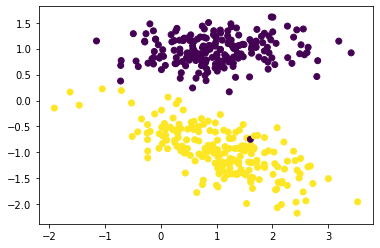

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [18]:
Y[Y==0] = -1        #changing labels from 0 to -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

## Algorithm

In [74]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeloss(self,W,b,X,Y):         # Loss Function
        loss = 0.0
        
        loss += 0.5*np.dot(W,W.T)
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*(max(0,(1-ti)))
            
        return loss[0][0]          #because loss is a matrix
    
    def fit(self,X,Y,maxItr=50,batch_size=100,learning_rate=0.001):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        n = learning_rate
        c = self.C
         
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        b = 0.0
        
        #Initial Loss
        print(self.hingeloss(W,b,X,Y))
        
        #Training from here....
        losses = []
        
        for i in range(maxItr):
            
            l = self.hingeloss(W,b,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                # Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_size+batch_start):
                    if j<no_of_samples:   #for not accessing out of limitd
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+b)
                        
                        if ti>1:
                            gradb+=0
                            gradw+=0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready!! 
                W = W - n*W + n*gradw
                b = b + n*gradb
             
        self.W = W
        self.b = b
        return W,b,losses
                    
        

In [75]:
mySVM = SVM()

In [76]:
W,b,losses = mySVM.fit(X,Y,maxItr=100)

400.0


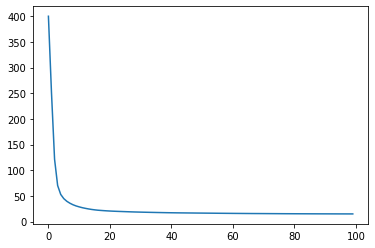

In [77]:
plt.plot(losses)
plt.show()

In [78]:
mySVM.W

array([[-0.32125075, -2.03601697]])

In [83]:
def plotHyperplane(W,b,X,Y):
    plt.figure(figsize=(10,8))
    x_1 = np.linspace(-2,4,20)
    x_2 = -(W[0,0]*x_1 + b)/W[0,1]
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.plot(x_1,x_2)
    plt.show()
    

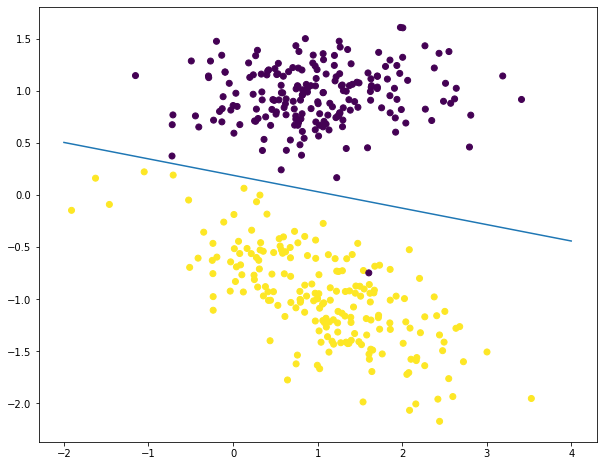

In [84]:
plotHyperplane(W,b,X,Y)